In [1]:
import pandas as pd

# Specify the path where you want to save the CSV file
file_path = 'data/word_attributions_rb.csv'

# Save the DataFrame to CSV
word_attributions_df = pd.read_csv(file_path)


In [2]:
word_attributions_df

,word,admiration_score,admiration_count,amusement_score,amusement_count,anger_score,anger_count,annoyance_score,annoyance_count,approval_score,...,relief_score,relief_count,remorse_score,remorse_count,sadness_score,sadness_count,surprise_score,surprise_count,neutral_score,neutral_count
0,<s>,0.000000,281,0.000000,113,0.000000,55,0.000000,83,0.000000,...,0.0,0,0.000000,45,0.000000,155,0.000000,37,0.000000,3405
1,hi,0.002015,2,0.035689,2,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.471796,4,-0.019609,6,0.000000,0,1.322971,46
2,im,3.178083,51,1.657004,97,-0.002995,11,4.864147,69,0.624838,...,0.0,0,0.775257,33,5.088185,231,0.931619,18,-28.446197,439
3,r,-0.347111,21,0.080260,11,0.008351,1,0.266318,10,0.000000,...,0.0,0,0.177270,4,0.081016,8,0.090215,2,-1.290583,317
4,ick,-0.104215,4,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.005500,1,0.000000,0,-0.787130,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13968,¿,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
13969,ı,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
13970,Ë,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
13971,¢,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0


In [3]:
emotions = ['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']
len(emotions)

28

## Emotion-Vocabulary relationship

In [4]:
# computing the avg score column

for emotion in emotions:
    score_col = emotion + "_score"
    count_col = emotion + "_count"
    avg_col = emotion + "_avg"
    word_attributions_df[avg_col] = word_attributions_df[score_col]/word_attributions_df[count_col]


In [5]:
# getting top words and last words by score

# Initialize dictionaries to store top words
top_10_words_score = {}
last_10_words_score = {}

for emotion in emotions:
    col_name = emotion + "_score"
    
    series1 = word_attributions_df.sort_values(by=col_name, ascending=False, inplace=False)['word'][:10]
    top_10_words_score[emotion] = series1.tolist()
    series2 = word_attributions_df.sort_values(by=col_name, ascending=True, inplace=False)['word'][:10]
    last_10_words_score[emotion] = series2.tolist()

In [6]:
# print(last_10_words_score)

In [7]:
for k, v in last_10_words_score.items():
    print(f"{k}: {v}")

admiration: ['my', 'love', 'dont', 'would', 'wait', 'wanted', 'an', 'roll', 'morals', 'i']
amusement: ['love', 'curious', 'like', 'frustrated', 'enjoy', 'hate', 'a', 'we', 'family', 'what']
anger: ['uncomfortable', 'dunno', 'think', 'went', 'sad', 'goals', 'afraid', 'stressed', 'any', 'sadly']
annoyance: ['crying', 'never', 'true', 'i', 'post', 'think', 'say', 'proud', 'depression', 'making']
approval: ['discouraging', 'love', 'wonderful', 'bad', 'white', 'stop', 'pain', 'need', 'though', 'sorely']
caring: ['i', '12', 'concerned', 'spiritual', '14', 'anger', 'people', 'piercing', 'first', 'assured']
confusion: ['want', 'might', 'believe', 'anything', 'anxiety', 'can', 'saw', 'little', 'ill', 'whats']
curiosity: ['removed', 'https', 'thank', 'hey', 'example', 'advance', 'so', 'y', 'condition', 'nervous']
desire: ['love', 'fucked', 'themed', 'happen', 'chat', 'mat', 'harmful', 'hate', 'frame', 'thanks']
disappointment: ['i', 'she', 'wish', 'what', 'said', 'sorry', 'makes', 'normal', 'get

In [8]:
import matplotlib.pyplot as plt

# Obtaining common words for each pair of emotions
num_emotions = len(emotions)

overlapping_words_list = []

for i in range(num_emotions - 1):
    for j in range(i + 1, num_emotions):
        emotion1 = emotions[i]
        emotion2 = emotions[j]

        # Extract words for the current pair of emotions
        words1 = set(top_10_words_score[emotion1])
        words2 = set(top_10_words_score[emotion2])

        # Calculate the intersection for the subsets
        common_words = words1.intersection(words2)

        if len(common_words) == 0:
            continue
            
        else:

            overlapping_words_list.append((emotion1, emotion2, list(common_words)))


In [9]:
# remove pronouns

filtered_list = []

# removing pronouns and contractions of pronouns
for tup in overlapping_words_list:
    (e1, e2, common_words_list) = tup
    if all(word not in common_words_list for word in ["i", "im", "ive", "its", "you"]):
        # removing the emotions not predicted by the model
        if e1 != "grief" and e2 != "relief":
            filtered_list.append(tup)

In [10]:
filtered_list

[('admiration', 'approval', ['best', 'good']),
 ('admiration', 'desire', ['good']),
 ('admiration', 'gratitude', ['appreciated']),
 ('admiration', 'love', ['best']),
 ('admiration', 'optimism', ['best']),
 ('admiration', 'surprise', ['appreciated']),
 ('anger', 'annoyance', ['stupid', 'shit', 'hate', 'fucking']),
 ('annoyance', 'disapproval', ['cant', 'hate']),
 ('approval', 'gratitude', ['welcome']),
 ('caring', 'desire', ['help', 'please']),
 ('caring', 'gratitude', ['help']),
 ('caring', 'nervousness', ['help']),
 ('caring', 'optimism', ['help']),
 ('curiosity', 'surprise', ['wondering']),
 ('desire', 'gratitude', ['help', 'would']),
 ('desire', 'nervousness', ['help', 'really']),
 ('disappointment', 'disapproval', ['nt', 'cant', 'dont', 'like']),
 ('disappointment', 'love', ['like']),
 ('embarrassment', 'nervousness', ['really']),
 ('gratitude', 'nervousness', ['help', 'thanks']),
 ('gratitude', 'optimism', ['help']),
 ('gratitude', 'remorse', ['would']),
 ('gratitude', 'surprise',

# User Analysis

1. Emotion lifecycle

In [11]:
# compile all reddit posts together

import pandas as pd
import json
import tqdm

datapath = "data/userReddit.csv"
reddit_data = pd.read_csv(datapath)

In [12]:
reddit_data['userId'].value_counts()

userId
CesaroSalad             791
serventofgaben          707
thecrazydeviant         445
schweenieboy            335
angelicdemon13          244
                       ... 
rinsllw                   1
Cutiepattotie5            1
WriotheslyEnthusiast      1
AirlineOwn3199            1
Awkward-Rub3379           1
Name: count, Length: 97, dtype: int64

In [13]:
reddit_data.columns

Index(['content', 'userId', 'createdTime', 'sentiment',
       'preprocessed_content'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt

user_post_counts = reddit_data['userId'].value_counts()

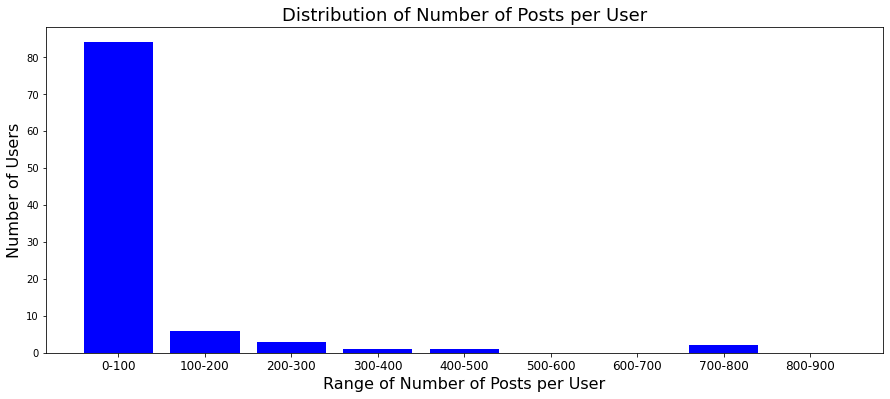

In [15]:
# Define the post count ranges
post_ranges = [(0, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700), (700, 800), (800, 900)]  # Add more ranges as needed

# Count the number of users falling into each range
counts_per_range = [(lower, upper, ((user_post_counts >= lower) & (user_post_counts < upper)).sum()) for lower, upper in post_ranges]

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ranges_labels = [f'{lower}-{upper}' for lower, upper in post_ranges]
ax.bar(ranges_labels, [count for _, _, count in counts_per_range], color='blue')

# Add labels and title
ax.set_xlabel('Range of Number of Posts per User', fontsize = 16)
ax.set_ylabel('Number of Users', fontsize = 16)
ax.set_title('Distribution of Number of Posts per User', fontsize = 18)

# Set the font size for x-axis labels
plt.xticks(fontsize=12)

# Save the plot to a file (e.g., PNG)
plt.savefig('Figures/postcount1.png')

# Display the plot
plt.show()

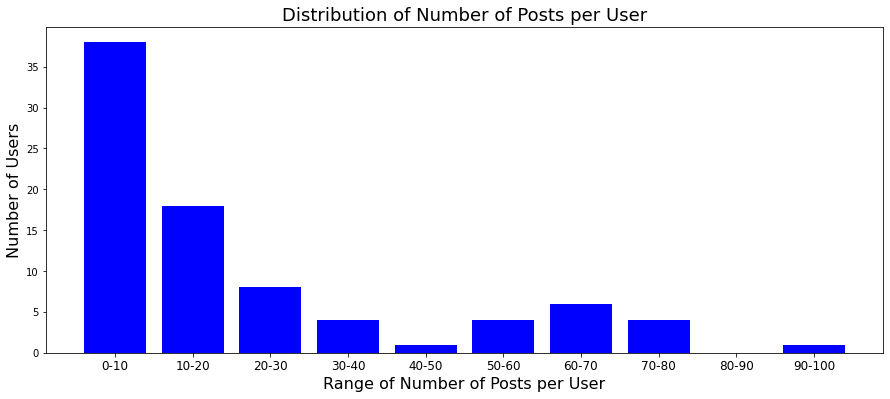

In [16]:
post_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]  # Add more ranges as needed

# Count the number of users falling into each range
counts_per_range = [(lower, upper, ((user_post_counts >= lower) & (user_post_counts < upper)).sum()) for lower, upper in post_ranges]

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ranges_labels = [f'{lower}-{upper}' for lower, upper in post_ranges]
ax.bar(ranges_labels, [count for _, _, count in counts_per_range], color='blue')

# Add labels and title
ax.set_xlabel('Range of Number of Posts per User', fontsize = 16)
ax.set_ylabel('Number of Users', fontsize = 16)
ax.set_title('Distribution of Number of Posts per User', fontsize = 18)

# Set the font size for x-axis labels
plt.xticks(fontsize=12)

plt.savefig('Figures/postcount2.png')

# Display the plot
plt.show()

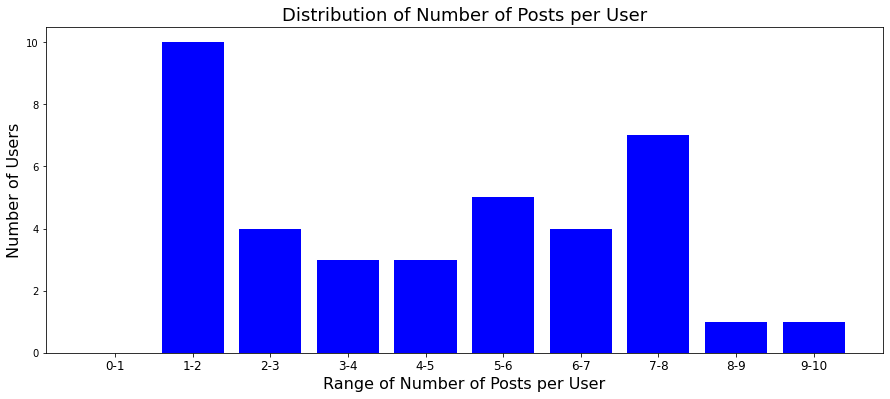

In [17]:
post_ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]  # Add more ranges as needed

# Count the number of users falling into each range
counts_per_range = [(lower, upper, ((user_post_counts >= lower) & (user_post_counts < upper)).sum()) for lower, upper in post_ranges]

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ranges_labels = [f'{lower}-{upper}' for lower, upper in post_ranges]
ax.bar(ranges_labels, [count for _, _, count in counts_per_range], color='blue')

# Add labels and title
ax.set_xlabel('Range of Number of Posts per User', fontsize = 16)
ax.set_ylabel('Number of Users', fontsize = 16)
ax.set_title('Distribution of Number of Posts per User', fontsize = 18)

# Set the font size for x-axis labels
plt.xticks(fontsize=12)

plt.savefig('Figures/postcount3.png')

# Display the plot
plt.show()

In [18]:
reddit_data.head()

,content,userId,createdTime,sentiment,preprocessed_content
0,Hi I'm Rick Astley. Good to be back here again...,ReallyRickAstley,1.697728e+09,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",hi im rick astley good back my new album are w...
1,Live stream chat with my new album and upcomin...,ReallyRickAstley,1.697647e+09,"{'neg': 0.06, 'neu': 0.713, 'pos': 0.227, 'com...",live stream chat new album upcoming ama hi im ...
2,Coming soon…\n,ReallyRickAstley,1.697149e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",coming soon
3,Rick Astley (me) - Never Gonna Stop [Pop]\n,ReallyRickAstley,1.693502e+09,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",rick astley never gonna stop pop
4,Rick Astley (me) - Dippin My Feet [Pop]\n,ReallyRickAstley,1.689269e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",rick astley dippin my feet pop


In [19]:
import json

# Open and read the JSON file as a list of lists
with open("RedditUserResults/ClassificationResults/rb_outputs.json", 'r') as file:
    classifier_rb_ops = json.load(file)

# Open and read the JSON file as a list of lists
with open("RedditUserResults/ClassificationResults/rb_errors.json", 'r') as file:
    classifier_rb_errors = json.load(file)


In [20]:
reddit_data.drop(classifier_rb_errors, axis=0, inplace=True)
reddit_data.reset_index(drop=True, inplace=True)


In [21]:
users = list(set(reddit_data['userId']))

user_emotion_lifecycle = {}

## getting all posts from a user and finding emotion of each post

In [22]:
# ! pip install tqdm
from tqdm import tqdm

In [23]:
# reddit_data[reddit_data['userId'] == user].info()

In [24]:
for user in tqdm(users, desc="Processing user posts", unit="user"):
    # getting lifecycle of emotions of single user
    emotions = []
    
    # getting post history of a user, and sorting it based on time
    user_history = reddit_data[reddit_data['userId'] == user]
    sorted_history = user_history.sort_values(by='createdTime')

    # getting emotion for each post id (from saved results of the classification model)
    upost_ids = sorted_history.index.tolist()
    for post_id in upost_ids:
        try:
            emotion = classifier_rb_ops[post_id][0]['label']
            emotions.append(emotion)
        except:
            print(post_id)
    user_emotion_lifecycle[user] = emotions


Processing user posts: 100%|██████████| 97/97 [00:00<00:00, 1453.72user/s]


In [25]:
# user_emotion_lifecycle

In [26]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/msaxena4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# getting life cycle of topic modelling of a user

from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

user_topics_lifecycle = {}

for user in tqdm(users, desc="Processing user posts", unit="user"):
    topics = []
    uposts = reddit_data[reddit_data['userId'] == user]['preprocessed_content'].tolist()
    post_tokens = [word_tokenize(post) for post in uposts]

    # Create a dictionary representation of the posts
    dictionary = corpora.Dictionary(post_tokens)
    
    # Create a document-term matrix
    corpus = [dictionary.doc2bow(post) for post in post_tokens]
    
    # Build the LDA model
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
    
    # Get the topics for each post
    post_topics = []
    for i, upost in enumerate(uposts):
        # Get the document-term matrix for the post
        post_bow = dictionary.doc2bow(post_tokens[i])
    
        # Get the topics for the post
        topics = lda_model.get_document_topics(post_bow)
        
        # Append the topics to the list
        post_topics.append(topics)
    
    user_topics_lifecycle[user] = post_topics

Processing user posts:  64%|██████▍   | 62/97 [00:18<00:06,  5.14user/s]

In [ ]:
# user_topics_lifecycle

In [ ]:
len(users)

In [ ]:
labels = {}
labels["label_col"] = []
for output in classifier_rb_ops:
    labels['label_col'].append(output[0]['label'])

In [ ]:
df = pd.DataFrame(labels)

In [ ]:
df.value_counts(dropna=False)

In [ ]:
emotions = ['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']
len(emotions)

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'label_col' is the column you want to plot

all_labels = emotions
filtered_df = df[df['label_col'] != 'neutral']

label_counts = filtered_df.groupby('label_col').size().reindex(all_labels, fill_value=0)

# Exclude neutral from the plot
label_counts = label_counts[label_counts.index != 'neutral']

# Sort label_counts in descending order
label_counts = label_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Increase the figure size

bar_plot = label_counts.plot(kind='bar', color='blue')

plt.title('Distribution of (predicted) Emotional Labels', fontsize=20)
plt.xlabel('Emotion Labels', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file (e.g., PNG)
plt.savefig('Figures/emotion_distribution.png')

# Display the plot
plt.show()


In [ ]:
print(all_labels)

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'label_col' is the column you want to plot

all_labels = emotions
filtered_df = df[df['label_col'] != 'neutral']

label_counts = filtered_df.groupby('label_col').size().reindex(all_labels, fill_value=0)

# Exclude neutral from the plot
label_counts = label_counts[label_counts.index != 'neutral']

# Sort label_counts in descending order
label_counts = label_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Increase the figure size

bar_plot = label_counts.plot(kind='bar', color='blue')

plt.title('Distribution of (predicted) Emotional Labels', fontsize=20)
plt.xlabel('Emotion Labels', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Annotate each bar with its count value
for i, v in enumerate(label_counts):
    bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file (e.g., PNG)
plt.savefig('Figures/emotion_distribution.png')

# Display the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame and 'label_col' is the column you want to plot

# all_labels = emotions
# filtered_df = df[df['label_col'] != 'neutral']

# label_counts = filtered_df.groupby('label_col').size().reindex(all_labels, fill_value=0)

# # Exclude neutral from the plot
# label_counts = label_counts[label_counts.index != 'neutral']

# # Sort label_counts in descending order
# label_counts = label_counts.sort_values(ascending=False)

# plt.figure(figsize=(12, 8))  # Increase the figure size

# bar_plot = label_counts.plot(kind='bar', color='blue')
# x
# plt.title('Distribution of (predicted) Emotional Labels', fontsize=20)
# plt.xlabel('Emotion Labels', fontsize=16)
# plt.ylabel('Count', fontsize=16)

# # Rotate x-axis labels for better readability
# bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# # Annotate each bar with its count value on top of a vertical line
# for i, v in enumerate(label_counts):
#     bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
#     plt.axvline(i, color='black', linestyle='dashed', linewidth=1)

# # Adjust layout for better spacing
# plt.tight_layout()

# # Save the plot to a file (e.g., PNG)
# plt.savefig('Figures/emotion_distribution.png')

# # Display the plot
# plt.show()


In [ ]:
len(set(df['label_col']))

In [ ]:
state_transitions = [value for value in user_emotion_lifecycle.values()]

In [ ]:
# state_transitions

In [ ]:
with open('emotion_transitions.json', 'w') as jsonfile:
    json.dump(state_transitions, jsonfile)

In [ ]:
with open('user_emotion_lifecycle.json', 'w') as jsonfile:
    json.dump(user_emotion_lifecycle, jsonfile)